In [9]:
import pandas as pd
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [10]:
data = pd.read_csv('student_clustering.csv')
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [11]:
data.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [12]:
data.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
X = data.iloc[:, [0, 1]].values


In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/home/teddy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


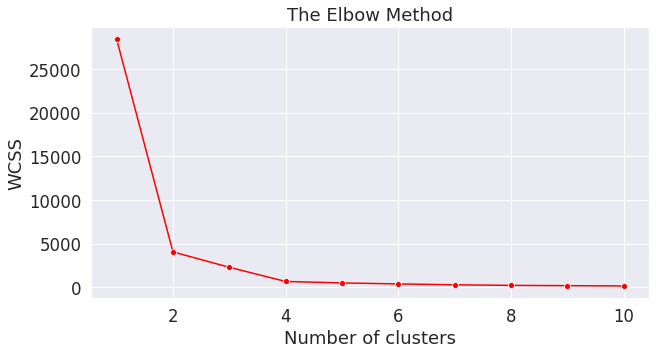

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/home/teddy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/teddy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/teddy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tedd

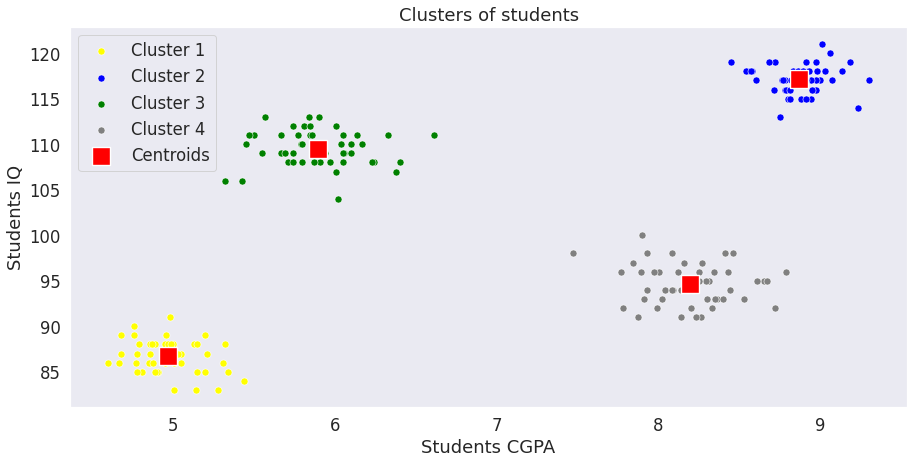

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of students')
plt.xlabel('Students CGPA')
plt.ylabel('Students IQ')
plt.legend()
plt.show()

From the cluster created above it can be clearly inferred that the higher the students cgpa the higher their iq
and they become clusters based on that

In [19]:
data['cluster'] = pd.DataFrame(y_kmeans)
data.head()

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0


In [20]:
data.to_csv("out.csv", index = False)


In [21]:
data1 = pd.read_csv('out.csv')
data1

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0
...,...,...,...
188,4.68,89,NaN
189,8.57,118,NaN
190,5.85,112,NaN
191,6.23,108,NaN


In [22]:
data1.isnull().sum()

cgpa       0
iq         0
cluster    7
dtype: int64

In [23]:
data1 =data1.dropna()

In [24]:
data1

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0
...,...,...,...
181,8.23,91,3.0
182,8.95,116,0.0
183,6.33,111,1.0
184,8.44,94,2.0


In [25]:
data1.isnull().sum()

cgpa       0
iq         0
cluster    0
dtype: int64

In [26]:
X1 = data1.iloc[:, [0, 1]].values
Y1= data1.iloc[:, [2]].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.3, random_state = 0)
model= LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
example = model.predict([[8.3,89]])

# Print prediction
print(int(example))

2


In [38]:
!pip install seaborn
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.8 MB/s eta 0:00:01


ValueError: x and y must be the same size

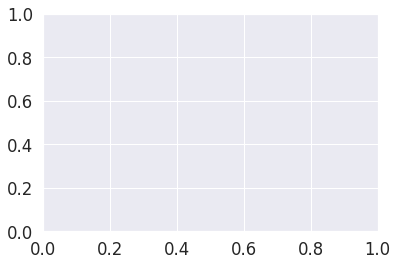

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_linear_regression
intercept, slope, corr_coeff = plot_linear_regression(X_train,  y_train,)
plt.show()